In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Shannon Entropy

Shannon entropy is defined by:

$$H(X) = -\sum_n{P(X=x)*log(P(X=x))}$$

Where the summation is over all the classes in the probability distribution P and X is a random variable.

Entropy is a measure of impurity.  It is quantified by the number of bits required to encode a piece of information.  For example, to encode a fair coin flip, one would need 1 bit (0 for tails, 1 for heads).  However, let's say there is an unfair coin where it only shows up heads.  Then, eventhough we have 2 outputs, only head is possible so we technically need 'less bits' (even though less than 1 bit is not possible).  That's why we multiple by the probability of each output class.

In [78]:
#measures impurity of distribution.
#In other terms, returns at least how many bits are required to encode information
def get_entropy(probabilities):
    return -np.sum([probabilities[i]*math.log(probabilities[i],2) \
                    if probabilities[i] != 0 else probabilities[i]*math.log(0.0001, 2)\
                    for i in range(len(probabilities)) ])

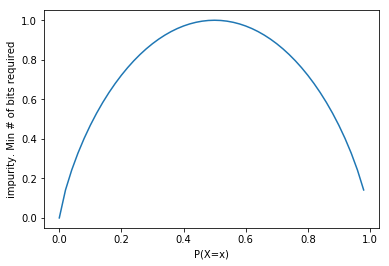

In [83]:
#binary variable output with varying probabilities
num_trials = 50
xs = []
ys = []
for i in range(num_trials):
    epsilon = i * (1/float(num_trials))
    prob = 1 - epsilon
    xs.append(epsilon)
    ys.append(get_entropy([prob, epsilon]))

    
plt.plot(xs, ys)
plt.ylabel('impurity. Min # of bits required')
plt.xlabel('P(X=x)')
plt.show()

The above graph shows that if the probability is 0.5, we require the most number of bits (ie, highest impurity) to encode the data, where if the probability is close to 0 or 1, we need less bits.  



In [80]:
#3 classes of uniform distribution
#note that here we need at least 1.58 bits -> 2 bits. (three out of (00, 01, 10, 11))
probabilities = [0.33, 0.33, 0.33]
get_entropy(probabilities)

1.5834674497121084

In [81]:
#in the case where one out of the three classes is impossible, we only need 1 bit
probabilities = [0, 0.5, 0.5]
get_entropy(probabilities)

1.0

In [71]:
#if one of the class has a small possibility, we need an extra bit to represent it
probabilities = [0.2, 0.49, 0.49]
get_entropy(probabilities)

1.4729490377237986

In [72]:
#for 4 classes, we can expect 2 bits required.
probabilities = [0.25, 0.25, 0.25, 0.25]
get_entropy(probabilities)

2.0

In [77]:
#with 5 classes, we will need more than 2.17 bits -> 3 bits to encode the information
probabilities = [0.1, 0.3, 0.3, 0.1, 0.2]
get_entropy(probabilities)

2.170950594454669